###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2017 L.A. Barba, N.C. Clementi

# Life expectancy and wealth

Welcome to **Lesson 4** of the second module in _Engineering Computations_. This module gives you hands-on data analysis experience with Python, using real-life applications. The first three lessons provide a foundation in data analysis using a computational approach. They are:

1. [Lesson 1](http://go.gwu.edu/engcomp2lesson1): Cheers! Stats with beers.
2. [Lesson 2](http://go.gwu.edu/engcomp2lesson2): Seeing stats in a new light.
3. [Lesson 3](http://go.gwu.edu/engcomp2lesson3): Lead in lipstick.

You learned to do exploratory data analysis with data in the form of arrays: NumPy has built-in functions for many descriptive statistics, making it easy! And you also learned to make data visualizations that are both good-looking and effective in communicating and getting insights from data.

But NumPy can't do everything. So we introduced you to `pandas`, a Python library written _especially_ for data analysis. It offers a very powerful new data type: the _DataFrame_—you can think of it as a spreadsheet, conveniently stored in one Python variable. 

In this lesson, you'll dive deeper into `pandas`, using data for life expectancy and per-capita income over time, across the world.

## The best stats you've ever seen

[Hans Rosling](https://en.wikipedia.org/wiki/Hans_Rosling) was a professor of international health in Sweden, until his death in Februrary of this year. He came to fame with the thrilling TED Talk he gave in 2006: ["The best stats you've ever seen"](https://www.ted.com/talks/hans_rosling_shows_the_best_stats_you_ve_ever_seen) (also on [YouTube](https://youtu.be/RUwS1uAdUcI), with ads). We highly recommend that you watch it! 

In that first TED Talk, and in many other talks and even a BBC documentary (see the [trailer](https://youtu.be/jbkSRLYSojo) on YouTube), Rosling uses data visualizations to tell stories about the world's health, wealth, inequality and development. Using software, he and his team created amazing animated graphics with data from the United Nations and World Bank.

According to a [blog post](https://www.gatesnotes.com/About-Bill-Gates/Remembering-Hans-Rosling) by Bill and Melinda Gates after Prof. Rosling's death, his message was simple: _"that the world is making progress, and that policy decisions should be grounded in data."_

In this lesson, we'll use data about life expectancy and per-capita income (in terms of the gross domestic product, GDP) around the world. Visualizing and analyzing the data will be our gateway to learning more about the world we live in.

Let's begin! As always, we start by importing the Python libraries for data analysis (and setting some plot parameters).

In [2]:
import numpy
import pandas
from matplotlib import pyplot
%matplotlib inline

#Import rcParams to set font styles
from matplotlib import rcParams

#Set font style and size 
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

## Load and inspect the data

We found a website called [The Python Graph Gallery](https://python-graph-gallery.com), which has a lot of data visualization examples. 
Among them is a [Gapminder Animation](https://python-graph-gallery.com/341-python-gapminder-animation/), an animated GIF of bubble charts in the style of Hans Rosling. 
We're not going to repeat the same example, but we do get some ideas from it and re-use their data set. 
The data file is hosted on their website, and we can read it directly from there into a `pandas` dataframe, using the URL.

In [5]:
# Read a dataset for life expectancy from a CSV file hosted online
url = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/gapminderData.csv'
life_expect = pandas.read_csv(url)

The first thing to do always is to take a peek at the data. 
Using the `shape` attribute of the dataframe, we find out how many rows and columns it has. In this case, it's kind of big to print it all out, so to save space we'll print a small portion of `life_expect`.
You can use a slice to do this, or you can use the [`DataFrame.head()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) method, which returns by default the first 5 rows.

In [9]:
life_expect.shape

(1704, 6)

### In the code block below show the first 5 rows of the DataFrame

In [8]:
life_expect[:5]

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


You can see that the columns hold six types of data: the country, the year, the population, the continent, the life expectancy, and the per-capita gross domestic product (GDP). 
Rows are indexed from 0, and the columns each have a **label** (also called an index). Using labels to access data is one of the most powerful features of `pandas`.

In the first five rows, we see that the country repeats (Afghanistan), while the year jumps by five. We guess that the data is arranged in blocks of rows for each country.

We can get a useful summary of the dataframe with the [`DataFrame.info()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html) method: it tells us the number of rows and the number of columns (matching the output of the `shape` attribute) and then for each column, it tells us the number of rows that are populated (have non-null entries) and the type of the entries; finally it gives a breakdown of the types of data and an estimate of the memory used by the dataframe.

In [10]:
life_expect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   year       1704 non-null   int64  
 2   pop        1704 non-null   float64
 3   continent  1704 non-null   object 
 4   lifeExp    1704 non-null   float64
 5   gdpPercap  1704 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 80.0+ KB


The dataframe has 1704 rows, and every column has 1704 non-null entries, so there is no missing data. Let's find out how many entries of the same year appear in the data. 
In [Lesson 1](http://go.gwu.edu/engcomp2lesson1) of this module, you already learned to extract a column from a data frame, and use the [`series.value_counts()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) method to answer our question.

In [12]:
life_expect['year'].value_counts()

1952    142
1957    142
1962    142
1967    142
1972    142
1977    142
1982    142
1987    142
1992    142
1997    142
2002    142
2007    142
Name: year, dtype: int64

We have an even 142 occurrences of each year in the dataframe. The distinct entries must correspond to each country. It also is clear that we have data every five years, starting 1952 and ending 2007. We think we have a pretty clear picture of what is contained in this data set. What next?

## Grouping data for analysis

We have a dataframe with a `country` column, where countries repeat in blocks of rows, and a `year` column, where sets of 12 years (increasing by 5) repeat for every country. Tabled data commonly has this interleaved structure. And data analysis often involves grouping the data in various ways, to transform it, compute statistics, and visualize it.

With the life expectancy data, it's natural to want to analyze it by year (and look at geographical differences), and by country (and look at historical differences). 

In [Lesson 2](http://go.gwu.edu/engcomp2lesson2) of this module, we already learned how useful it was to group the beer data by style, and calculate means within each style. Let's get better acquainted with the powerful `groupby()` method for dataframes. First, grouping by the values in the `year` column:

In [13]:
by_year = life_expect.groupby('year')

In [14]:
type(by_year)

pandas.core.groupby.generic.DataFrameGroupBy

Notice that the type of the new variable `by_year` is different: it's a _GroupBy_ object, which—without making a copy of the data—is able to apply operations on each of the groups.

The [`GroupBy.first()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.GroupBy.first.html) method, for example, returns the first row in each group—applied to our grouping `by_year`, it shows the list of years (as a label), with the first country that appears in each year-group.

In [15]:
by_year.first()

,country,pop,continent,lifeExp,gdpPercap
year,,,,,
1952,Afghanistan,8425333.0,Asia,28.801,779.445314
1957,Afghanistan,9240934.0,Asia,30.332,820.853030
1962,Afghanistan,10267083.0,Asia,31.997,853.100710
1967,Afghanistan,11537966.0,Asia,34.020,836.197138
1972,Afghanistan,13079460.0,Asia,36.088,739.981106
1977,Afghanistan,14880372.0,Asia,38.438,786.113360
1982,Afghanistan,12881816.0,Asia,39.854,978.011439
1987,Afghanistan,13867957.0,Asia,40.822,852.395945
1992,Afghanistan,16317921.0,Asia,41.674,649.341395


All the year-groups have the same first country, Afghanistan, so what we see is the population, life expectancy and per-capita income in Afghanistan for all the available years.
Let's save that into a new dataframe, and make a line plot of the population and life expectancy over the years.

In [28]:
Afghanistan = by_year.first()

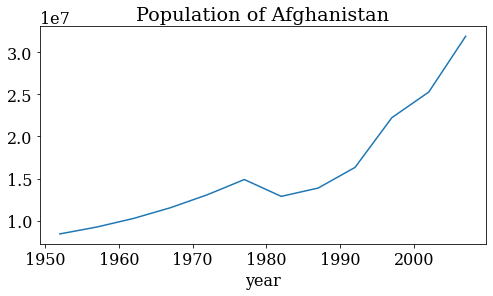

In [20]:
Afghanistan['pop'].plot(figsize=(8,4),
                       title='Population of Afghanistan');

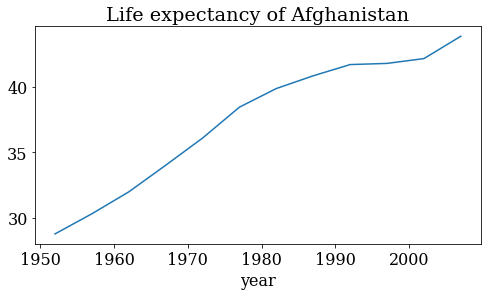

In [ ]:
Afghanistan['lifeExp'].plot(figsize=(8,4),
                       title='Life expectancy of Afghanistan');

Do you notice something interesting? It's curious to see that the population of Afghanistan took a fall after 1977. We have data every 5 years, so we don't know exactly when this fall began, but it's not hard to find the answer online. The USSR invaded Afghanistan in 1979, starting a conflict that lasted 9 years and resulted in an estimated death toll of one million civilians and 100,000 fighters [1]. Millions fled the war to neighboring countries, which may explain why we se a dip in population, but not a dip in life expectancy.

We can also get some descriptive statistics in one go with the [`DataFrame.describe()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) method of `pandas`.

In [ ]:
Afghanistan.describe()

,pop,lifeExp,gdpPercap
count,1.200000e+01,12.000000,12.000000
mean,1.582372e+07,37.478833,802.674598
std,7.114583e+06,5.098646,108.202929
min,8.425333e+06,28.801000,635.341351
25%,1.122025e+07,33.514250,736.669343
50%,1.347371e+07,39.146000,803.483195
75%,1.779529e+07,41.696250,852.572136
max,3.188992e+07,43.828000,978.011439


Let's now group our data by country, and use the `GroupBy.first()` method again to get the first row of each group-by-country. We know that the first year for which we have data is 1952, so let's immediately save that into a new variable named `year1952`, and keep playing with it. Below, we double-check the type of `year1952`, print the first five rows using the `head()` method, and get the minimum value of the population column.

In [43]:
by_country = life_expect.groupby('country')

The first year for all groups-by-country is 1952. Let's save that first group into a new dataframe, and keep playing with it.

### As we did above with by_year, do the same with by_country and store the result of using the `.first()` function in the variable `year1952`.

In [46]:
year1952 = by_country.first()
print(year1952)

                    year         pop continent  lifeExp    gdpPercap
country                                                             
Afghanistan         1952   8425333.0      Asia   28.801   779.445314
Albania             1952   1282697.0    Europe   55.230  1601.056136
Algeria             1952   9279525.0    Africa   43.077  2449.008185
Angola              1952   4232095.0    Africa   30.015  3520.610273
Argentina           1952  17876956.0  Americas   62.485  5911.315053
...                  ...         ...       ...      ...          ...
Vietnam             1952  26246839.0      Asia   40.412   605.066492
West Bank and Gaza  1952   1030585.0      Asia   43.160  1515.592329
Yemen, Rep.         1952   4963829.0      Asia   32.548   781.717576
Zambia              1952   2672000.0    Africa   42.038  1147.388831
Zimbabwe            1952   3080907.0    Africa   48.451   406.884115

[142 rows x 5 columns]


In [48]:
type(year1952)

pandas.core.frame.DataFrame

In [47]:
year1952.head()

,year,pop,continent,lifeExp,gdpPercap
country,,,,,
Afghanistan,1952,8425333.0,Asia,28.801,779.445314
Albania,1952,1282697.0,Europe,55.230,1601.056136
Algeria,1952,9279525.0,Africa,43.077,2449.008185
Angola,1952,4232095.0,Africa,30.015,3520.610273
Argentina,1952,17876956.0,Americas,62.485,5911.315053


### What is the minimum value of the population column of `year1952`?

In [50]:
min(year1952["pop"])

60011.0

## Visualizing the data

In [Lesson 2](http://go.gwu.edu/engcomp2lesson2) of this module, you learned to make bubble charts, allowing you to show at least three features of the data in one plot. We'd like to make a bubble chart of life expectancy vs. per-capita GDP, with the size of the bubble proportional to the population. To do that, we'll need to extract the population values into a NumPy array.

In [51]:
populations = year1952['pop'].values

If you use the `populations` array unmodified as the size of the bubbles, they come out _huge_ and you get one solid color covering the figure (we tried it!). To make the bubble sizes reasonable, we divide by 60,000—an approximation to the minimum population—so the smallest bubble size is about 1 pt. Finally, we choose a logarithmic scale in the absissa (the GDP). Check it out!

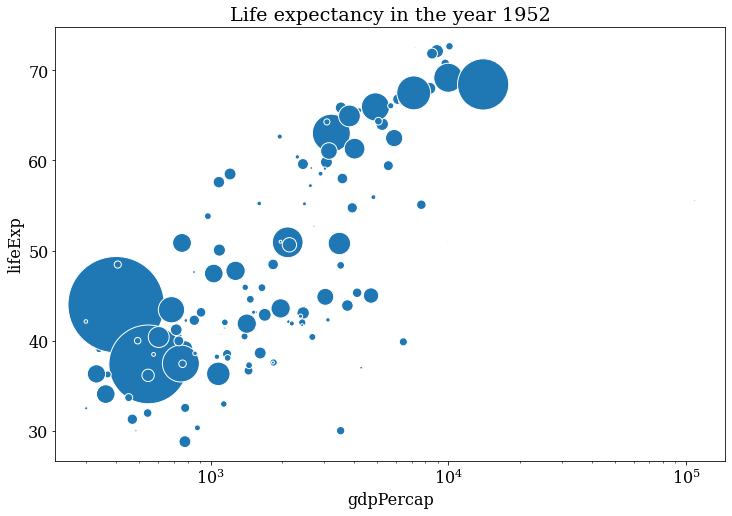

In [52]:
year1952.plot.scatter(figsize=(12,8), 
                       x='gdpPercap', y='lifeExp', s=populations/60000, 
                       title='Life expectancy in the year 1952',
                       edgecolors="white")
pyplot.xscale('log');

That's neat! But the Rosling bubble charts include one more feature in the data: the continent of each country, using a color scheme. Can we do that?

Matplotlib [colormaps](https://matplotlib.org/examples/color/colormaps_reference.html) offer several options for _qualitative_ data, using discrete colors mapped to a sequence of numbers. We'd like to use the `Accent` colormap to code countries by continent. But we need a numeric code to assign to each continent, so it can be mapped to a color.

The [Gapminder Animation](https://python-graph-gallery.com/341-python-gapminder-animation/) example at The Python Graph Gallery has a good tip: using the `pandas` _Categorical_ data type, which associates a numerical value for each category in a column containing qualitative (categorical) data. 

Let's see what we get if we apply  `pandas.Categorical()` to the `continent` column:

In [53]:
pandas.Categorical(year1952['continent'])

['Asia', 'Europe', 'Africa', 'Africa', 'Americas', ..., 'Asia', 'Asia', 'Asia', 'Africa', 'Africa']
Length: 142
Categories (5, object): ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']

Right. We see that the `continent` column has repeated entries of 5 distinct categories, one for each continent. In order, they are: Africa, Americas, Asia, Europe, Oceania.

Applying [`pandas.Categorical()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Categorical.html) to the `continent` column will create an integer value—the _code_ of the category—associated to each entry. We can then use these integer values to map to the colors in a colormap. The trick will be to extract the `codes` attribute of the _Categorical_ data and save that into a new variable named `colors` (a NumPy array).

In [54]:
colors = pandas.Categorical(year1952['continent']).codes

In [55]:
type(colors)

numpy.ndarray

In [56]:
len(colors)

142

In [57]:
print(colors)

[2 3 0 0 1 4 3 2 2 3 0 1 3 0 1 3 0 0 2 0 1 0 0 1 2 1 0 0 0 1 0 3 1 3 3 0 1
 1 0 1 0 0 0 3 3 0 0 3 0 3 1 0 0 1 1 2 3 3 2 2 2 2 3 2 3 1 2 2 0 2 2 2 2 0
 0 0 0 0 2 0 0 0 1 2 3 0 0 2 0 2 3 4 1 0 0 3 2 2 1 1 1 2 3 3 1 0 3 0 0 2 0
 3 0 2 3 3 0 0 3 2 0 0 3 3 2 2 0 2 0 1 0 3 0 3 1 1 1 2 2 2 0 0]


You see that `colors` is a NumPy array of 142 integers that can take the values: ` 0, 1, 2, 3, 4`. They are the codes to `continent` categories: `Africa, Americas, Asia, Europe, Oceania`. For example, the first entry is `2`, corresponding to Asia, the continent of Afghanistan.

Now we're ready to re-do our bubble chart, using the array `colors` to set the color of the bubble (according to the continent for the given country).

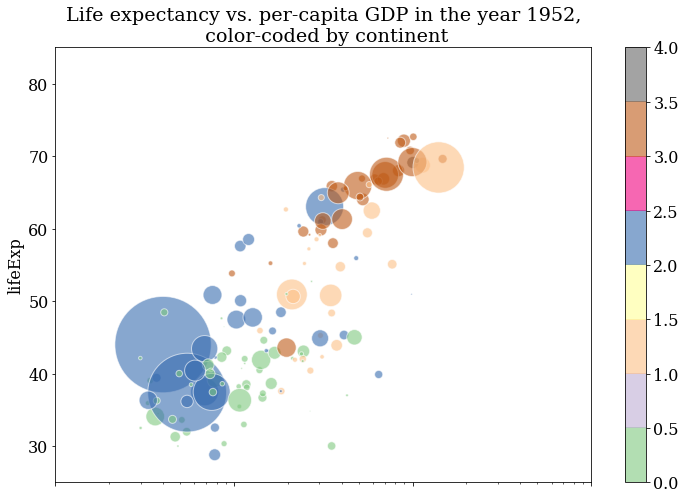

In [58]:
year1952.plot.scatter(figsize=(12,8), 
                         x='gdpPercap', y='lifeExp', s=populations/60000, 
                         c=colors, cmap='Accent',
                         title='Life expectancy vs. per-capita GDP in the year 1952,\n color-coded by continent',
                         logx = True,
                         ylim = (25,85),
                         xlim = (1e2, 1e5),
                         edgecolors="white",
                         alpha=0.6);

##### Note:

We encountered a bug in `pandas` scatter plots! The labels of the $x$-axis disappeared when we added the colors to the bubbles. We tried several things to fix it, like adding the line `pyplot.xlabel("GDP per Capita")` at the end of the cell, but nothing worked. Searching online, we found an open [issue report](https://github.com/pandas-dev/pandas/issues/10611) for this problem.


##### Discuss with your neighbor:

What do you see in the colored bubble chart, in regards to 1952 conditions in different countries and different continents?
Can you guess some countries? Can you figure out which color corresponds to which continent?

### Spaghetti plot of life expectancy

The bubble plot shows us that 1952 life expectancies varied quite a lot from country to country: from a minimum of under 30 years, to a maximum under 75 years. The first part of Prof. Rosling's dying message is _"that the world is making progress_." Is it the case that countries around the world _all_ make progress in life expectancy over the years?

We have an idea: what if we plot a line of life expectancy over time, for every country in the data set? It could be a bit messy, but it may give an _overall view_ of the world-wide progress in life expectancy.

Below, we'll make such a plot, with 142 lines: one for each country. This type of graphic is called a **spaghetti plot** …for obvious reasons!

To add a line for each country on the same plot, we'll use a `for`-statement and the `by_country` groups. For each country-group, the line plot takes the series `year` and `lifeExp` as $(x,y)$ coordinates. Since the spaghetti plot is quite busy, we also took off the box around the plot. Study this code carefully.

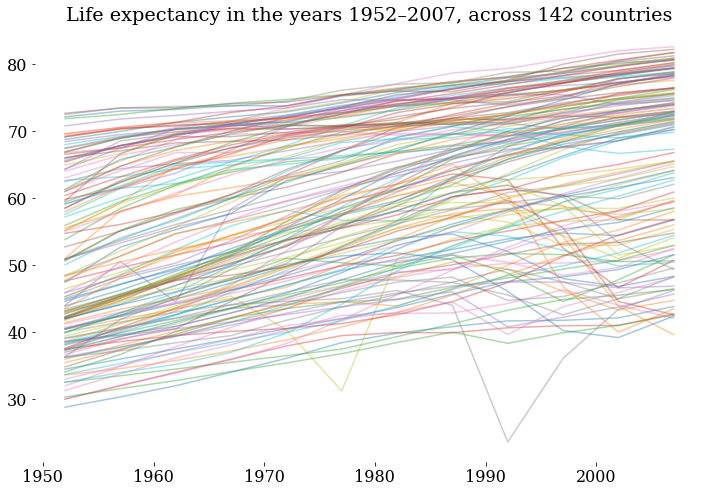

In [ ]:
pyplot.figure(figsize=(12,8))

for key,group in by_country:
    pyplot.plot(group['year'], group['lifeExp'], alpha=0.4)
    
pyplot.title('Life expectancy in the years 1952–2007, across 142 countries')
pyplot.box(on=None);

## Dig deeper and get insights from the data

The spaghetti plot shows a general upwards tendency, but clearly not all countries have a monotonically increasing life expectancy. Some show a one-year sharp drop (but remember, this data jumps every 5 years), while others drop over several years.
And something catastrophic happened to one country in 1977, and to another country in 1992.
Let's investigate this!

We'd like to explore the data for a particular year: first 1977, then 1992. For those years, we can get the minimum life expectancy, and then find out which country experienced it. 

To access a particular group in _GroupBy_ data, `pandas` has a `get_group(key)` method, where `key` is the label of the group.
For example, we can access yearly data from the `by_year` groups using the year as key. The return type will be a dataframe, containing the same columns as the original data.

In [59]:
type(by_year.get_group(1977))

pandas.core.frame.DataFrame

In [60]:
type(by_year['lifeExp'].get_group(1977))

pandas.core.series.Series

Now we can find the minimum value of life expectancy at the specific years of interest, using the `Series.min()` method. Let' do this for 1977 and 1992, and save the values in new Python variables, to reuse later.

In [61]:
min_lifeExp1977 = by_year['lifeExp'].get_group(1977).min()
min_lifeExp1977

31.22

In [62]:
min_lifeExp1992 = by_year['lifeExp'].get_group(1992).min()
min_lifeExp1992

23.599

Those values of life expectancy are just terrible! Are you curious to know what countries experienced the dramatic drops in life expectancy?

We can find the row _index_ of the minimum value, thanks to the [`pandas.Series.idxmin()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.idxmin.html) method. The row indices are preserved from the original dataframe `life_expect` to its groupings, so the index will help us identify the country. Check it out.

In [63]:
by_year['lifeExp'].get_group(1977).idxmin()

221

In [64]:
life_expect['country'][221]

'Cambodia'

In [65]:
by_country.get_group('Cambodia')

,country,year,pop,continent,lifeExp,gdpPercap
216,Cambodia,1952,4693836.0,Asia,39.417,368.469286
217,Cambodia,1957,5322536.0,Asia,41.366,434.038336
218,Cambodia,1962,6083619.0,Asia,43.415,496.913648
219,Cambodia,1967,6960067.0,Asia,45.415,523.432314
220,Cambodia,1972,7450606.0,Asia,40.317,421.624026
221,Cambodia,1977,6978607.0,Asia,31.220,524.972183
222,Cambodia,1982,7272485.0,Asia,50.957,624.475478
223,Cambodia,1987,8371791.0,Asia,53.914,683.895573
224,Cambodia,1992,10150094.0,Asia,55.803,682.303175
225,Cambodia,1997,11782962.0,Asia,56.534,734.285170


We searched online to learn what was happening in Cambodia to cause such a drop in life expectancy in the 1970s. Indeed, Cambodia experienced a _mortality crisis_ due to several factors that combined into a perfect storm: war, ethnic cleansing and migration, collapse of the health system, and cruel famine [2].
It's hard for a country to keep vital statistics under such circumstances, and certainly the data for Cambodia in the 1970s is uncertain.
However, various sources report a life expectancy there in 1977 that was _under 20 years_.
See, for example, the World Bank's interactive web page on [Cambodia](https://data.worldbank.org/country/cambodia).

Something is strange about the data from the The Python Graph Gallery. Is it wrong?
Maybe they are giving us _average_ life expectancy in a five-year period.
Let's look at the other dip in life expectancy, in 1992.

In [66]:
by_year['lifeExp'].get_group(1992).idxmin()

1292

In [67]:
life_expect['country'][1292]

'Rwanda'

In [68]:
by_country.get_group('Rwanda')

,country,year,pop,continent,lifeExp,gdpPercap
1284,Rwanda,1952,2534927.0,Africa,40.000,493.323875
1285,Rwanda,1957,2822082.0,Africa,41.500,540.289398
1286,Rwanda,1962,3051242.0,Africa,43.000,597.473073
1287,Rwanda,1967,3451079.0,Africa,44.100,510.963714
1288,Rwanda,1972,3992121.0,Africa,44.600,590.580664
1289,Rwanda,1977,4657072.0,Africa,45.000,670.080601
1290,Rwanda,1982,5507565.0,Africa,46.218,881.570647
1291,Rwanda,1987,6349365.0,Africa,44.020,847.991217
1292,Rwanda,1992,7290203.0,Africa,23.599,737.068595
1293,Rwanda,1997,7212583.0,Africa,36.087,589.944505


The World Bank's interactive web page on [Rwanda](https://data.worldbank.org/country/rwanda) gives a life expectancy of 28.1 in 1992, and even lower in 1993, at 27.6 years. 
This doesn't match the value from the data set we sourced from The Python Graph Gallery, which gives 23.6—and since this value is _lower_ than the minimum value given by the World Bank, we conclude that the discepancy is not caused by 5-year averaging.

## Checking data quality

All our work here started with loading a data set we found online. What if this data set has _quality_ problems? 

Well, nothing better than asking the author of the web source for the data. We used Twitter to communicate with the author of The Python Graph Gallery, and he replied with a link to _his source_: a data package used for teaching a course in Exploratory Data Analysis at the University of British Columbia. 

In [69]:
%%html
<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">Hi. Didn&#39;t receive your email... Gapminder comes from this R library: <a href="https://t.co/BU1IFIGSxm">https://t.co/BU1IFIGSxm</a>. I will add citation asap.</p>&mdash; R+Py Graph Galleries (@R_Graph_Gallery) <a href="https://twitter.com/R_Graph_Gallery/status/920074231269941248?ref_src=twsrc%5Etfw">October 16, 2017</a></blockquote> <script async src="//platform.twitter.com/widgets.js" charset="utf-8"></script>

Note one immediate outcome of our reaching out to the author of The Python Graph Gallery: he realized he was not citing the source of his data [3], and promised to add proper credit. _It's always good form to credit your sources!_

We visited the online repository of the data source, and posted an [issue report](https://github.com/jennybc/gapminder/issues/18) there, with our questions about data quality. The author promptly responded, saying that _her_ source was the [Gapminder.org website](http://www.gapminder.org/data/)—**Gapminder** is the non-profit founded by  Hans Rosling to host public data and visualizations. She also said: _" I don't doubt there could be data quality problems! It should definitely NOT be used as an authoritative source for life expectancy"_

So it turns out that the data we're using comes from a set of tools meant for teaching, and is not up-to-date with the latest vital statistics. The author ended up [adding a warning](https://github.com/jennybc/gapminder/commit/7b3ac7f477c78f21865fa7defea20e72cb9e2b8a) to make this clear to visitors of the repository on GitHub. 

#### This is a wonderful example of how people collaborate  online via the open-source model.

##### Note:

For the most accurate data, you can visit the website of the [World Bank](https://data.worldbank.org).

## Using widgets to visualize interactively

One more thing! This whole exploration began with our viewing the 2006 TED Talk by Hans Rosling: ["The best stats you've ever seen"](https://www.ted.com/talks/hans_rosling_shows_the_best_stats_you_ve_ever_seen). One of the most effective parts of the presentation is seeing the _animated_ bubble chart, illustrating how countries became healthier and richer over time. Do you want to make something like that?

You can! Introducing [Jupyter Widgets](https://ipywidgets.readthedocs.io/en/latest/user_guide.html). The magic of interactive widgets is that they tie together the running Python code in a Jupyter notebook with Javascript and HTML running in the browser. You can use widgets to build interactive controls on data visualizations, with buttons, sliders, and more.

To use widgets, the first step is to import the `widgets` module.

*N.B. if you are using Deepnote, ipywidgets is not supported*

In [71]:
from ipywidgets import widgets

ModuleNotFoundError: No module named 'ipywidgets'

After importing `widgets`, you have available several UI (User Interaction) elements. One of our favorites is a _Slider_: an interactive sliding button. Here is a default slider that takes integer values, from 0 to 100 (but does nothing):

In [ ]:
widgets.IntSlider()

What we'd like to do is make an interactive visualization of bubble charts, with the year in a slider, so that we can run forwards and backwards in time by sliding the button, watching our plot update the bubbles in real time. Sound like magic? It almost is.

The magic happens when you program what should happen when the value in the slider changes. A typical scenario is having a function that is executed with the value in the slider, interactively. To create that, we need two things:

1. A function that will be called with the slider values, and
2. A call to an _interaction_ function from the `ipywidgets` package.

Several interaction functions are available, for different actions you expect from the user: a click, a text entered in a box, or sliding the button on a slider.
You will need to explore the Jupyter Widgets documentation [4] to learn more.

For this example, we'll be using a slider, a plotting function that makes our bubble chart, and the [`.interact()`](http://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html#) function to call our plotting function with each value of the slider.

We do everything in one cell below. The first line creates an integer-value slider with our known years—from a minimum 1952, to a maximum 2007, stepping by 5—and assigns it to the variable name `slider`.

Next, we define the function `roslingplot()`, which re-calculates the array of population values, gets the year-group we need from the `by_year` _GroupBy_ object, and makes a scater plot of life expectancy vs. per-capita income, like we did above. The `populations` array (divided by 60,000) sets the size of the bubble, and the previously defined `colors` array sets the color coding by continent.

We also removed the colorbar (which added little information), and added the option `sharex=False` following the workaround suggested by someone on the open [issue report](https://github.com/pandas-dev/pandas/issues/10611) for the plotting bug we mentioned above.

The last line in the cell below is a call to `.interact()`, passing our plotting function and the slider value assigned to its argument, `year`. Watch the magic happen!

In [ ]:
slider = widgets.IntSlider(min=1952, max=2007, step=5)

def roslingplot(year):
    populations = by_year.get_group(year)['pop'].values
    
    by_year.get_group(year).plot.scatter(figsize=(12,8), 
                         x='gdpPercap', y='lifeExp', s=populations/60000, 
                         c=colors, cmap='Accent',
                         title='Life expectancy vs per-capita GDP in the year '+ str(year)+'\n',
                         logx = True,
                         ylim = (25,85),
                         xlim = (1e2, 1e5),
                         edgecolors="white",
                         alpha=0.6,
                         colorbar=False,
                         sharex=False)
    pyplot.show();
    
widgets.interact(roslingplot, year=slider);

## References

1. [The Soviet War in Afghanistan, 1979-1989](https://www.theatlantic.com/photo/2014/08/the-soviet-war-in-afghanistan-1979-1989/100786/), The Atlantic (2014), by Alan Taylor.

2. US National Research Council Roundtable on the Demography of Forced Migration; H.E. Reed, C.B. Keely, editors.  Forced Migration & Mortality (2001), National Academies Press, Washington DC; Chapter 5: The Demographic Analysis of Mortality Crises: The Case of Cambodia, 1970-1979, Patrick Heuveline. Available at: https://www.ncbi.nlm.nih.gov/books/NBK223346/

3. gapminder: Data from Gapminder (R data package), by Jennifer (Jenny) Bryan, repository at  https://github.com/jennybc/gapminder, v0.3.0 (Version v0.3.0) on Zenodo: https://doi.org/10.5281/zenodo.594018, licensed CC-BY 3.0

4. [Jupyter Widgets User Guide](https://ipywidgets.readthedocs.io/en/latest/user_guide.html)

In [1]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../style/custom.css'
HTML(open(css_file, "r").read())